# Import Libraries Needed

In [1]:
import praw
import pandas as pd
import getpass

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

#nltk.download('all')

# Entering Reddit Creditentials to Access Reddit API

In [9]:
# Read-only instance
reddit_read_only = praw.Reddit(client_id=getpass.getpass(),         # your client id
                               client_secret=getpass.getpass(),      # your client secret
                               user_agent=getpass.getpass())        # your user agent
 
# Authorized instance
reddit_authorized = praw.Reddit(client_id=getpass.getpass(),         # your client id
                                client_secret=getpass.getpass(),      # your client secret
                                user_agent=getpass.getpass(),        # your user agent
                                username=getpass.getpass(),        # your reddit username
                                password=getpass.getpass())        # your reddit password


 ········
 ········
 ········
 ········
 ········
 ········
 ········
 ········


# Choosing the Detroit Lions subreddit for analysis and returning the display name, title, and description of the subreddit. Sanity check to make sure we successfully accessed it

In [10]:
subreddit = reddit_read_only.subreddit("detroitlions")
 
# Display the name of the Subreddit
print("Display Name:", subreddit.display_name)
 
# Display the title of the Subreddit
print("Title:", subreddit.title)
 
# Display the description of the Subreddit
print("Description:", subreddit.description)

Display Name: detroitlions
Title: Detroit Lions
Description: [](http://detroitredwings.reddit.com)[](http://detroitlions.reddit.com)[](http://motorcitykitties.reddit.com)[](http://detroitpistons.reddit.com)

&nbsp;

####Brought to you by r/detroitlions

####[2024 NFC North Standings](http://espn.go.com/nfl/standings)  

Team|W-L|Division|SB Losses
:-|:-:|:-:|:-:|:-:|:-:|:-
[Lions](/r/detroitlions) | 0-0 | 0-0 | 0
[Vikings](/r/minnesotavikings) | 0-0 | 0-0 | 4
[Packers](/r/greenbaypackers) | 0-0 | 0-0 | 1
[Bears](/r/chibears) | 0-0 | 0-0 | 1
&nbsp;
[](https://www.youtube.com/channel/UCSNl9u4xgkA_D11Bl85H63Q)
&nbsp;
[](https://www.detroitlions.com/)
&nbsp;
[](http://www.detroitlions.com/team/injury-report.html)

####[](#images) Rules and Meme status

### [**Memes are fresh and dank** (Click to hide.)](https://nm.reddit.com/r/detroitlions/) [**Memes were killed with fire** (Click to show.)](https://www.reddit.com/r/detroitlions/)

###[Subreddit Rules & Posting Guidelines](http://www.reddi

# Returning the first 5 posts on the subreddit

In [11]:
for post in subreddit.hot(limit=5):
    print(post.title)
    print()

Ari Meirov (@MySportsUpdate) on X “#Chiefs DE Isaiah Buggs is facing two misdemeanor warrants issued by Tuscaloosa police for second-degree cruelty to dogs. Buggs is accused of leaving two dogs locked on his property with no access to food or water, according to @TuscaloosaPatch.”

Analyst: Jameson Williams Is 'More Than Just a Speed Merchant'; This guy can run all the routes, and he is so dangerous after the catch.

Our division 

Indy NXT Driver Nolan Allaer Rocking a Custom Lions Racing Helmet 

Players' Defining Moments



# Returning a dataframe of the top posts of the subreddit, the ranking based on "Score" (Upvotes)

In [12]:
posts = subreddit.top(time_filter="month")
# Scraping the top posts of the current month
 
posts_dict = {"Title": [], "Post Text": [],
              "ID": [], "Score": [],
              "Total Comments": [], "Post URL": []
              }
 
for post in posts:
    # Title of each post
    posts_dict["Title"].append(post.title)
     
    # Text inside a post
    posts_dict["Post Text"].append(post.selftext)
     
    # Unique ID of each post
    posts_dict["ID"].append(post.id)
     
    # The score of a post
    posts_dict["Score"].append(post.score)
     
    # Total number of comments inside the post
    posts_dict["Total Comments"].append(post.num_comments)
     
    # URL of each post
    posts_dict["Post URL"].append(post.url)
 
# Saving the data in a pandas dataframe
top_posts = pd.DataFrame(posts_dict)
top_posts


,Title,Post Text,ID,Score,Total Comments,Post URL
0,Another done deal in Detroit: Lions are signin...,,1cr9tv5,2475,601,https://x.com/adamschefter/status/179011957558...
1,Kerby Joseph sent me a Gift for Draft Shenanig...,I made Kerby laugh at the draft so he sent me ...,1cjbb06,2258,217,https://www.reddit.com/gallery/1cjbb06
2,Dan Campbell says that the most improved playe...,,1cyv3ii,1120,190,https://x.com/prideofdetroit/status/1793659989...
3,Michigan Panther Kicker Jack Bates Hits Anothe...,,1cky23o,1004,163,https://v.redd.it/brhdjbv1knyc1
4,"Terrion Arnold: ""I want to be remembered as th...",,1cluv9j,890,132,https://twitter.com/NFL/status/178755794608101...
...,...,...,...,...,...,...
95,Giovanni Manu says Detroit Lions view him as g...,,1cgqxyw,263,102,https://www.prideofdetroit.com/2024/4/29/24144...
96,Lions most underrated player?,,1d19zmd,263,100,https://i.redd.it/listvnnovt2d1.jpeg
97,[Lions] That's Our QB,,1ctgivl,261,22,https://x.com/Lions/status/1791138036345913453
98,It was only 3 years ago,"Just completely dogged us out at our lowest, n...",1cz60q1,260,39,https://www.reddit.com/gallery/1cz60q1


# Choosing a specific post to analyze from the subreddit

In [13]:
# URL of the post
url = "https://www.reddit.com/r/detroitlions/comments/17kbnwl/raiders_lions_post_game_thread/?utm_source=share&utm_medium=web2x&context=3"
 
# Creating a submission object
submission = reddit_read_only.submission(url=url)

# Collecting the comments of the post to a dataframe

In [14]:
post_comments = []
submission.comments.replace_more(limit=None, threshold=0)
for comment in submission.comments.list():
    post_comments.append(comment.body)
    
comments_df = pd.DataFrame(post_comments, columns=['comments'])
comments_df

,comments
0,If we were more efficient in the red zone toni...
1,It’s very nice that the Lions can play a super...
2,Lol DaVante Adams just ran straight to the loc...
3,6-2.. enjoy your bye week everybody!!
4,Dan “Primetime” Campbell
...,...
646,Bozo lol? You’re saying something I’m aware of...
647,It wasn’t my choice to have your program parti...
648,Can’t wait to here the lies and excuses with t...
649,We’ll see 🤷‍♂️ but at least we won’t be dirty ...


# For ease of use and recalling the dataframe later if mistakes happen, saving the comments to a .CSV file, then recalling it

In [15]:
comments_df.to_csv('raiders_post_game_reddit_comments.csv', index=False) 

In [179]:
df = pd.read_csv('raiders_post_game_reddit_comments.csv') 
df

,comments
0,If we were more efficient in the red zone tonight this would have been a complete blowout. What a huge bounce back win after getting our dicks handed to us last week.\n\n6-2 going into the Bye Week? Yessssirrrrrr!
1,"It’s very nice that the Lions can play a super ugly, mistake ridden game and still win very comfortably. Clean up the mistakes over the Bye and get healthy. A W is a W, and you never take that for granted in this league. We move"
2,Lol DaVante Adams just ran straight to the locker room.
3,6-2.. enjoy your bye week everybody!!
4,Dan “Primetime” Campbell
...,...
646,Bozo lol? You’re saying something I’m aware of and admit. Urban Meyer dominated Harbaugh. I never try to say otherwise and you know that since I’ve been talking about Day. But since he left Michigan has had their best teams in decades and Ryan Day hasn’t lived up to Meyer against Harbaugh things have changed.\n\nAlso… not going anywhere.. Harbaugh signing that contract this week and NCAA isn’t going to bail you guys out 😂 it’s pathetic that’s how you want to get rid of Michigan.. man times r...
647,"It wasn’t my choice to have your program participate in the most brazen cheating scandal in sports history…I prefer Michigan to be good. It’s a shame they couldn’t do it without cheating though. Good luck with the recruiting 👍🏻 I guess if Penn state survived Sandusky then this too shall pass, right?"
648,Can’t wait to here the lies and excuses with the third straight loss to Michigan. Won’t be able to use cheating this time since there’s all the time in the world to game plan signals. Ahh it’s gonna be hilarious when you turn on Day again just like last year 😂 then if he somehow survives you will act like he’s the greatest coach again next season 😆
649,We’ll see 🤷‍♂️ but at least we won’t be dirty cheaters\n\nLol…what a little bitch to block here 😂


# Collecting word count, character count, average word length, number of stopwords, and use of numerics for each comment

In [180]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

stop = stopwords.words('english')

df['word_count'] = df['comments'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['comments'].str.len()
df['avg_word_len'] = df['comments'].apply(lambda x: avg_word(x))
df['stopwords'] = df['comments'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['numerics'] = df['comments'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df

,comments,word_count,char_count,avg_word_len,stopwords,numerics
0,If we were more efficient in the red zone tonight this would have been a complete blowout. What a huge bounce back win after getting our dicks handed to us last week.\n\n6-2 going into the Bye Week? Yessssirrrrrr!,38,211,4.410256,15,0
1,"It’s very nice that the Lions can play a super ugly, mistake ridden game and still win very comfortably. Clean up the mistakes over the Bye and get healthy. A W is a W, and you never take that for granted in this league. We move",46,228,3.978261,20,0
2,Lol DaVante Adams just ran straight to the locker room.,10,55,4.600000,3,0
3,6-2.. enjoy your bye week everybody!!,6,37,5.333333,1,0
4,Dan “Primetime” Campbell,3,24,7.333333,0,0
...,...,...,...,...,...,...
646,Bozo lol? You’re saying something I’m aware of and admit. Urban Meyer dominated Harbaugh. I never try to say otherwise and you know that since I’ve been talking about Day. But since he left Michigan has had their best teams in decades and Ryan Day hasn’t lived up to Meyer against Harbaugh things have changed.\n\nAlso… not going anywhere.. Harbaugh signing that contract this week and NCAA isn’t going to bail you guys out 😂 it’s pathetic that’s how you want to get rid of Michigan.. man times r...,92,525,4.645161,31,0
647,"It wasn’t my choice to have your program participate in the most brazen cheating scandal in sports history…I prefer Michigan to be good. It’s a shame they couldn’t do it without cheating though. Good luck with the recruiting 👍🏻 I guess if Penn state survived Sandusky then this too shall pass, right?",52,300,4.788462,20,0
648,Can’t wait to here the lies and excuses with the third straight loss to Michigan. Won’t be able to use cheating this time since there’s all the time in the world to game plan signals. Ahh it’s gonna be hilarious when you turn on Day again just like last year 😂 then if he somehow survives you will act like he’s the greatest coach again next season 😆,68,350,4.161765,28,0
649,We’ll see 🤷‍♂️ but at least we won’t be dirty cheaters\n\nLol…what a little bitch to block here 😂,18,95,4.000000,7,0


# Next, before moving futher in feature extraction, we will perform pre-processing steps for text analysis (lowercasing, removing punctuation, removing stopwords, common word removal, rare word removal, and spell correction)

In [181]:
#preprocessing

In [182]:
#lowercasing
df['comments'] = df['comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,comments,word_count,char_count,avg_word_len,stopwords,numerics
0,if we were more efficient in the red zone tonight this would have been a complete blowout. what a huge bounce back win after getting our dicks handed to us last week. 6-2 going into the bye week? yessssirrrrrr!,38,211,4.410256,15,0
1,"it’s very nice that the lions can play a super ugly, mistake ridden game and still win very comfortably. clean up the mistakes over the bye and get healthy. a w is a w, and you never take that for granted in this league. we move",46,228,3.978261,20,0
2,lol davante adams just ran straight to the locker room.,10,55,4.600000,3,0
3,6-2.. enjoy your bye week everybody!!,6,37,5.333333,1,0
4,dan “primetime” campbell,3,24,7.333333,0,0


In [183]:
stop = ["1", "2", "3", "4", "5", "6", "7", "9", "12", "62", "6-2", "it", "s", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doesnt",  "doing", "don", "done", "don't", "dont", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz", "lol", "lmao"]

In [184]:
#removing stopwords
df['comments'] = df['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,comments,word_count,char_count,avg_word_len,stopwords,numerics
0,efficient red zone tonight complete blowout. huge bounce win dicks handed week. bye week? yessssirrrrrr!,38,211,4.410256,15,0
1,"it’s nice lions play super ugly, mistake ridden game win comfortably. clean mistakes bye healthy. w, granted league.",46,228,3.978261,20,0
2,davante adams straight locker room.,10,55,4.600000,3,0
3,6-2.. enjoy bye week everybody!!,6,37,5.333333,1,0
4,dan “primetime” campbell,3,24,7.333333,0,0


In [185]:
#removing punctuation
df['comments'] = df['comments'].str.replace('[^\\w\\s]','',regex=True)
df.head()

,comments,word_count,char_count,avg_word_len,stopwords,numerics
0,efficient red zone tonight complete blowout huge bounce win dicks handed week bye week yessssirrrrrr,38,211,4.410256,15,0
1,its nice lions play super ugly mistake ridden game win comfortably clean mistakes bye healthy w granted league,46,228,3.978261,20,0
2,davante adams straight locker room,10,55,4.600000,3,0
3,62 enjoy bye week everybody,6,37,5.333333,1,0
4,dan primetime campbell,3,24,7.333333,0,0


In [186]:
#removing stopwords
df['comments'] = df['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,comments,word_count,char_count,avg_word_len,stopwords,numerics
0,efficient red zone tonight complete blowout huge bounce win dicks handed week bye week yessssirrrrrr,38,211,4.410256,15,0
1,nice lions play super ugly mistake ridden game win comfortably clean mistakes bye healthy granted league,46,228,3.978261,20,0
2,davante adams straight locker room,10,55,4.600000,3,0
3,enjoy bye week,6,37,5.333333,1,0
4,dan primetime campbell,3,24,7.333333,0,0


In [187]:
#common word removal
freq = pd.Series(' '.join(df['comments']).split()).value_counts()[:10]
freq

game     133
win       76
good      72
lions     61
team      54
time      50
bye       47
play      40
week      39
ball      36
Name: count, dtype: int64

In [188]:
freq = list(freq.index)
df['comments'] = df['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df.head()

,comments,word_count,char_count,avg_word_len,stopwords,numerics
0,efficient red zone tonight complete blowout huge bounce dicks handed yessssirrrrrr,38,211,4.410256,15,0
1,nice super ugly mistake ridden comfortably clean mistakes healthy granted league,46,228,3.978261,20,0
2,davante adams straight locker room,10,55,4.600000,3,0
3,enjoy,6,37,5.333333,1,0
4,dan primetime campbell,3,24,7.333333,0,0


In [189]:
#rare word removal
freq = pd.Series(' '.join(df['comments']).split()).value_counts()[-10:]
freq

wooo                                                                    1
hmyeahhh                                                                1
awww                                                                    1
criticisms                                                              1
cousins                                                                 1
esp                                                                     1
divisionhttpstheelegacycontinuescomproductsonepridechenillecrewnecks    1
humble                                                                  1
idc                                                                     1
dummy                                                                   1
Name: count, dtype: int64

In [190]:
freq = list(freq.index)
df['comments'] = df['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df.head()

,comments,word_count,char_count,avg_word_len,stopwords,numerics
0,efficient red zone tonight complete blowout huge bounce dicks handed yessssirrrrrr,38,211,4.410256,15,0
1,nice super ugly mistake ridden comfortably clean mistakes healthy granted league,46,228,3.978261,20,0
2,davante adams straight locker room,10,55,4.600000,3,0
3,enjoy,6,37,5.333333,1,0
4,dan primetime campbell,3,24,7.333333,0,0


In [191]:
#spelling correction
df['comments'].apply(lambda x: str(TextBlob(x).correct()))

0                                                                                                                                                         efficient red zone tonight complete blowout huge bounce docks handed yessssirrrrrr
1                                                                                                                                                           nice super ugly mistake ridden comfortably clean mistakes healthy granted league
2                                                                                                                                                                                                         advance adams straight locked room
3                                                                                                                                                                                                                                      enjoy
4                                                   

# As the spell correction using the TextBlob library takes a considerate amount of time, we will save this dataframe to a .CSV file and recall it. After doing so, we will continue will pre-processing (tokenization, stemming, lemmatization)

In [192]:
df.to_csv('raiders_post_game_reddit_comments_preprocessed.csv', index=False) 

In [193]:
preprocessed_df = pd.read_csv('raiders_post_game_reddit_comments_preprocessed.csv') 

In [194]:
preprocessed_df = preprocessed_df.dropna()
preprocessed_df

,comments,word_count,char_count,avg_word_len,stopwords,numerics
0,efficient red zone tonight complete blowout huge bounce dicks handed yessssirrrrrr,38,211,4.410256,15,0
1,nice super ugly mistake ridden comfortably clean mistakes healthy granted league,46,228,3.978261,20,0
2,davante adams straight locker room,10,55,4.600000,3,0
3,enjoy,6,37,5.333333,1,0
4,dan primetime campbell,3,24,7.333333,0,0
...,...,...,...,...,...,...
646,bozo aware admit urban meyer dominated harbaugh ive talking day left michigan teams decades ryan day lived meyer harbaugh things changed harbaugh signing contract ncaa isnt bail guys pathetic rid michigan man times changed columbus,92,525,4.645161,31,0
647,choice program participate brazen cheating scandal sports historyi prefer michigan shame cheating luck recruiting guess penn state survived sandusky pass,52,300,4.788462,20,0
648,wait lies excuses straight loss michigan cheating plan signals ahh gonna hilarious turn day year survives greatest coach season,68,350,4.161765,28,0
649,dirty cheaters lolwhat bitch block,18,95,4.000000,7,0


In [195]:
#tokenization
preprocessed_df['tokenized_comments'] = preprocessed_df.apply(lambda row: nltk.word_tokenize(row['comments']), axis=1)
preprocessed_df

,comments,word_count,char_count,avg_word_len,stopwords,numerics,tokenized_comments
0,efficient red zone tonight complete blowout huge bounce dicks handed yessssirrrrrr,38,211,4.410256,15,0,"[efficient, red, zone, tonight, complete, blowout, huge, bounce, dicks, handed, yessssirrrrrr]"
1,nice super ugly mistake ridden comfortably clean mistakes healthy granted league,46,228,3.978261,20,0,"[nice, super, ugly, mistake, ridden, comfortably, clean, mistakes, healthy, granted, league]"
2,davante adams straight locker room,10,55,4.600000,3,0,"[davante, adams, straight, locker, room]"
3,enjoy,6,37,5.333333,1,0,[enjoy]
4,dan primetime campbell,3,24,7.333333,0,0,"[dan, primetime, campbell]"
...,...,...,...,...,...,...,...
646,bozo aware admit urban meyer dominated harbaugh ive talking day left michigan teams decades ryan day lived meyer harbaugh things changed harbaugh signing contract ncaa isnt bail guys pathetic rid michigan man times changed columbus,92,525,4.645161,31,0,"[bozo, aware, admit, urban, meyer, dominated, harbaugh, ive, talking, day, left, michigan, teams, decades, ryan, day, lived, meyer, harbaugh, things, changed, harbaugh, signing, contract, ncaa, isnt, bail, guys, pathetic, rid, michigan, man, times, changed, columbus]"
647,choice program participate brazen cheating scandal sports historyi prefer michigan shame cheating luck recruiting guess penn state survived sandusky pass,52,300,4.788462,20,0,"[choice, program, participate, brazen, cheating, scandal, sports, historyi, prefer, michigan, shame, cheating, luck, recruiting, guess, penn, state, survived, sandusky, pass]"
648,wait lies excuses straight loss michigan cheating plan signals ahh gonna hilarious turn day year survives greatest coach season,68,350,4.161765,28,0,"[wait, lies, excuses, straight, loss, michigan, cheating, plan, signals, ahh, gon, na, hilarious, turn, day, year, survives, greatest, coach, season]"
649,dirty cheaters lolwhat bitch block,18,95,4.000000,7,0,"[dirty, cheaters, lolwhat, bitch, block]"


In [196]:
#lemmatization

lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

preprocessed_df['text_lemmatized'] = preprocessed_df.tokenized_comments.apply(lemmatize_text)
preprocessed_df

,comments,word_count,char_count,avg_word_len,stopwords,numerics,tokenized_comments,text_lemmatized
0,efficient red zone tonight complete blowout huge bounce dicks handed yessssirrrrrr,38,211,4.410256,15,0,"[efficient, red, zone, tonight, complete, blowout, huge, bounce, dicks, handed, yessssirrrrrr]","[efficient, red, zone, tonight, complete, blowout, huge, bounce, dick, handed, yessssirrrrrr]"
1,nice super ugly mistake ridden comfortably clean mistakes healthy granted league,46,228,3.978261,20,0,"[nice, super, ugly, mistake, ridden, comfortably, clean, mistakes, healthy, granted, league]","[nice, super, ugly, mistake, ridden, comfortably, clean, mistake, healthy, granted, league]"
2,davante adams straight locker room,10,55,4.600000,3,0,"[davante, adams, straight, locker, room]","[davante, adam, straight, locker, room]"
3,enjoy,6,37,5.333333,1,0,[enjoy],[enjoy]
4,dan primetime campbell,3,24,7.333333,0,0,"[dan, primetime, campbell]","[dan, primetime, campbell]"
...,...,...,...,...,...,...,...,...
646,bozo aware admit urban meyer dominated harbaugh ive talking day left michigan teams decades ryan day lived meyer harbaugh things changed harbaugh signing contract ncaa isnt bail guys pathetic rid michigan man times changed columbus,92,525,4.645161,31,0,"[bozo, aware, admit, urban, meyer, dominated, harbaugh, ive, talking, day, left, michigan, teams, decades, ryan, day, lived, meyer, harbaugh, things, changed, harbaugh, signing, contract, ncaa, isnt, bail, guys, pathetic, rid, michigan, man, times, changed, columbus]","[bozo, aware, admit, urban, meyer, dominated, harbaugh, ive, talking, day, left, michigan, team, decade, ryan, day, lived, meyer, harbaugh, thing, changed, harbaugh, signing, contract, ncaa, isnt, bail, guy, pathetic, rid, michigan, man, time, changed, columbus]"
647,choice program participate brazen cheating scandal sports historyi prefer michigan shame cheating luck recruiting guess penn state survived sandusky pass,52,300,4.788462,20,0,"[choice, program, participate, brazen, cheating, scandal, sports, historyi, prefer, michigan, shame, cheating, luck, recruiting, guess, penn, state, survived, sandusky, pass]","[choice, program, participate, brazen, cheating, scandal, sport, historyi, prefer, michigan, shame, cheating, luck, recruiting, guess, penn, state, survived, sandusky, pas]"
648,wait lies excuses straight loss michigan cheating plan signals ahh gonna hilarious turn day year survives greatest coach season,68,350,4.161765,28,0,"[wait, lies, excuses, straight, loss, michigan, cheating, plan, signals, ahh, gon, na, hilarious, turn, day, year, survives, greatest, coach, season]","[wait, lie, excuse, straight, loss, michigan, cheating, plan, signal, ahh, gon, na, hilarious, turn, day, year, survives, greatest, coach, season]"
649,dirty cheaters lolwhat bitch block,18,95,4.000000,7,0,"[dirty, cheaters, lolwhat, bitch, block]","[dirty, cheater, lolwhat, bitch, block]"


# Now that pre-processing has been completed, we can explore NLP techniques (N-grams, term frequency, inverse document frequency, and term frequency - inverse document frequency (TF-IDF)

In [197]:
#advance text processing
#N-grams
TextBlob(preprocessed_df['comments'][0]).ngrams(2)

[WordList(['efficient', 'red']),
 WordList(['red', 'zone']),
 WordList(['zone', 'tonight']),
 WordList(['tonight', 'complete']),
 WordList(['complete', 'blowout']),
 WordList(['blowout', 'huge']),
 WordList(['huge', 'bounce']),
 WordList(['bounce', 'dicks']),
 WordList(['dicks', 'handed']),
 WordList(['handed', 'yessssirrrrrr'])]

In [198]:
#term frequency
term_freqs = preprocessed_df.comments.str.split(expand=True).stack().value_counts()
term_freqs_df = term_freqs.to_frame().reset_index()
term_freqs_df = term_freqs_df.rename({'index': 'words', 'count': 'tf'}, axis=1)
term_freqs_df

,words,tf
0,gibbs,35
1,great,34
2,raiders,32
3,crosby,32
4,bad,31
...,...,...
1995,asswhooping,1
1996,arrival,1
1997,pumped,1
1998,jah,1


In [199]:
#inverse document frequency
import numpy as np

for i,word in enumerate(term_freqs_df['words']):
    term_freqs_df.loc[i, 'idf'] = np.log(preprocessed_df.shape[0]/(len(preprocessed_df[preprocessed_df['comments'].str.contains(word)])))

term_freqs_df

,words,tf,idf
0,gibbs,35,2.950798
1,great,34,3.046108
2,raiders,32,2.981570
3,crosby,32,2.981570
4,bad,31,3.189209
...,...,...,...
1995,asswhooping,1,6.447306
1996,arrival,1,6.447306
1997,pumped,1,6.447306
1998,jah,1,5.061012


In [200]:
#term frequency - inverse document frequency (TF-IDF)
term_freqs_df['tfidf'] = term_freqs_df['tf'] * term_freqs_df['idf']
term_freqs_df

,words,tf,idf,tfidf
0,gibbs,35,2.950798,103.277941
1,great,34,3.046108,103.567688
2,raiders,32,2.981570,95.410239
3,crosby,32,2.981570,95.410239
4,bad,31,3.189209,98.865489
...,...,...,...,...
1995,asswhooping,1,6.447306,6.447306
1996,arrival,1,6.447306,6.447306
1997,pumped,1,6.447306,6.447306
1998,jah,1,5.061012,5.061012


# Plotting the top ten terms with highest TF Scores and TF-IDF Scores

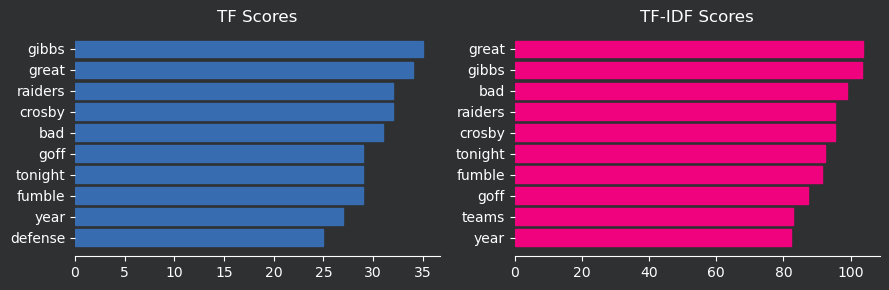

In [201]:
import matplotlib.pyplot as plt

#create 2 dataframes with the top 10 words for each method:

TF_IDF_scores = term_freqs_df[["words", "tfidf"]].sort_values(by = "tfidf", ascending = False).head(10)
TF_scores = term_freqs_df[["words", "tf"]].sort_values(by = "tf", ascending = False).head(10)

#plot:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 3))

#barplot:
ax1.barh(TF_scores["words"], TF_scores["tf"], color = "#386cb0", edgecolor = "#386cb0")
ax2.barh(TF_IDF_scores["words"], TF_IDF_scores["tfidf"], color = "#f0027f", edgecolor = "#f0027f")

#title:
ax1.set_title("TF Scores")
ax2.set_title("TF-IDF Scores")

for ax in fig.axes:                             # iterate over ax1, ax2, ax3 to: 
    ax.invert_yaxis()                           # invert the y axis; 
    ax.grid(False)                              # eliminate grid;
    ax.title.set_color('white')                 # set title font color to white;
    ax.tick_params(axis='x', colors='white')    # set x axis font color to white;
    ax.tick_params(axis='y', colors='white')    # set y axis font color to white;
    ax.set_facecolor('#2E3031')                 # set ax background color to #2E3031;
    ax.spines["top"].set_visible(False)         # eliminate spines;
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines['bottom'].set_color('white')

#fig background color:
fig.patch.set_facecolor('#2E3031')
#layout:
fig.tight_layout()



# Sentiment Analysis of comments

In [202]:
preprocessed_df['sentiment'] = preprocessed_df['comments'].apply(lambda x: TextBlob(x).sentiment[0] )
preprocessed_df[['comments','sentiment']]

,comments,sentiment
0,efficient red zone tonight complete blowout huge bounce dicks handed yessssirrrrrr,0.166667
1,nice super ugly mistake ridden comfortably clean mistakes healthy granted league,0.220000
2,davante adams straight locker room,0.200000
3,enjoy,0.400000
4,dan primetime campbell,0.000000
...,...,...
646,bozo aware admit urban meyer dominated harbaugh ive talking day left michigan teams decades ryan day lived meyer harbaugh things changed harbaugh signing contract ncaa isnt bail guys pathetic rid michigan man times changed columbus,-0.187500
647,choice program participate brazen cheating scandal sports historyi prefer michigan shame cheating luck recruiting guess penn state survived sandusky pass,0.000000
648,wait lies excuses straight loss michigan cheating plan signals ahh gonna hilarious turn day year survives greatest coach season,0.566667
649,dirty cheaters lolwhat bitch block,-0.600000


# Top 10 Sentiment Scoring Comments

In [203]:
pd.options.display.max_colwidth = 500

top_ten_sentiment = preprocessed_df[["comments", "sentiment"]].sort_values(by = "sentiment", ascending = False).head(10)
top_ten_sentiment

,comments,sentiment
49,defense held garoppolo 10 completions sacks freaking awesome,1.0
328,trading jerseys hutch perfect save airfare,1.0
308,wife son dan wonderful life,1.0
367,points points lot nfl mistakes impressive,1.0
68,mnf season hats detroit eagles fan tonight heart great great interviews absolutely great fans,0.8
348,teams great teams cover,0.8
493,agree played great stretch ride analzone,0.8
171,packers ranked 30th rofl,0.8
229,great showing teams beat teams supposed beat,0.8
350,asshole fans 50 years things reason people age happy hesitant,0.8


# Bottom 10 Sentiment Scoring Comments

In [204]:
bottom_ten_sentiment = preprocessed_df[["comments", "sentiment"]].sort_values(by = "sentiment", ascending = True).head(10)
bottom_ten_sentiment

,comments,sentiment
525,pick literally worst pass goffs career,-1.000000
297,hutchs evil twin,-1.000000
451,100 agreed 1h bjs worst playcalling performance tenure,-1.000000
20,shouldve 450 grief,-0.800000
351,idiot deserves lose embarrassing herehttpswwwredditcomrdetroitlionscomments17k6zrzcommentk766itsutm_sourceshareutm_mediumweb2xcontext3,-0.800000
234,god damn terrible turnovers didnt cost bad convincingly bad turnovers,-0.800000
505,yeah pat sick asterisk,-0.714286
534,painful kneecaps,-0.700000
120,teams ugly answered raiders close gibbs unleashed defense sacks tfls 4th stops int 3outs,-0.700000
15,ugly saleh,-0.700000


# Topic Modelling and Visualization with Gensim

In [205]:
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk
#nltk.download('punkt')


dictionary = corpora.Dictionary(preprocessed_df['tokenized_comments'])
corpus = [dictionary.doc2bow(text) for text in preprocessed_df['tokenized_comments']]

In [206]:
from gensim.models.ldamodel import LdaModel

lda = LdaModel(corpus, num_topics=6, id2word=dictionary, passes=15)
topics = lda.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.017*"fumble" + 0.011*"pick" + 0.008*"reynolds" + 0.008*"year"')
(1, '0.019*"crosby" + 0.010*"prime" + 0.009*"plays" + 0.007*"evidence"')
(2, '0.013*"great" + 0.011*"raiders" + 0.009*"gibbs" + 0.009*"defense"')
(3, '0.016*"love" + 0.009*"tonight" + 0.007*"healthy" + 0.006*"fans"')
(4, '0.008*"yards" + 0.006*"wife" + 0.005*"bad" + 0.005*"michigan"')
(5, '0.011*"gibbs" + 0.008*"sloppy" + 0.007*"half" + 0.007*"fucking"')


In [207]:
from IPython.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.078484 -0.032003       1        1  21.798232
0      0.095102 -0.041919       2        1  20.760184
4     -0.020017  0.144031       3        1  15.020752
3     -0.126886 -0.072886       4        1  14.493875
5     -0.007890  0.017000       5        1  14.293250
1     -0.018792 -0.014224       6        1  13.633706, topic_info=         Term       Freq      Total Category  logprob  loglift
32     crosby  22.000000  22.000000  Default  30.0000  30.0000
90     fumble  22.000000  22.000000  Default  29.0000  29.0000
328      love  13.000000  13.000000  Default  28.0000  28.0000
264     prime   7.000000   7.000000  Default  27.0000  27.0000
170      pick  16.000000  16.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
90     fumble   2.955358  22.015959   Topic6  -5.4140  -0.0155
200     weeks   2.129652   7.641053   Topic6  -5.7416   0.7150
541     trade   2.128583   9.262118   Topic6  -5.7422   0.5221
387  happened   2.127078   7.758535   Topic6  -5.7429   0.6986
10       zone   2.126850  17.119322   Topic6  -5.7430  -0.0929

[407 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
181       3  0.365195    15
181       5  0.365195    15
770       3  0.725920    23
206       1  0.403257   2nd
206       4  0.604886   2nd
...     ...       ...   ...
10        2  0.058414  zone
10        3  0.058414  zone
10        4  0.233654  zone
10        5  0.175241  zone
10        6  0.116827  zone

[732 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 4, 6, 2])

# Save LDA Visualization to HTML file for viewing

In [210]:
pyLDAvis.save_html(lda_viz, 'lda_visualization.html')

In [209]:
#reference for lda nmodel: https://medium.com/nlplanet/text-analysis-topic-modelling-with-spacy-gensim-4cd92ef06e06
#reference: https://praw.readthedocs.io/en/latest/tutorials/comments.html
#reference: https://www.geeksforgeeks.org/scraping-reddit-using-python/
#reference for nltk: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
#reference for preprocessing: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/